In [83]:
##################################################################################
#                                BEN WISH LE                                     #
#                                 ENGR 3703                                      #
#                              DUE: 05/05/2022                                   #
# You are an essential ingredient in our ongoing effort to reduce Security Risk. #
##################################################################################

from IPython.display import Image
img = Image(url="1.PNG", width = 1500, height = 6000)
img


Unforced test cases: f(t)/m = 0




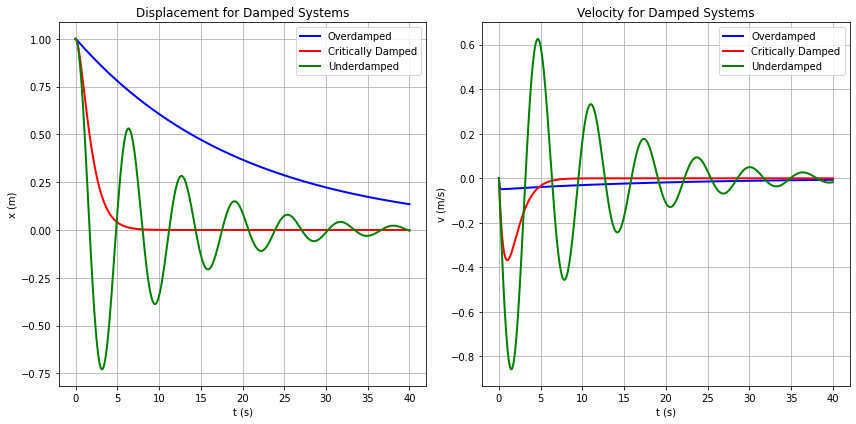

In [129]:
# 2 and 3. Using value of F(t)/m = 0
# Test the code with all three unforced cases - overdamping, critically damped, and underdamping
# 

%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

# Test case: f(t)/m = 0
zeta_od = 10
zeta_cd = 1.
zeta_ud = 0.1

omega_n = 1.0
omega_d = omega_n * sqrt(1-zeta_ud**2)

v0 = 0
x0 = 1
t0 = 0
t_end = 40
dt = (t_end - t0) / 499

t_1 = t0
t_2 = t0
t_3 = t0

v_1 = v0
v_2 = v0
v_3 = v0

x_1 = x0
x_2 = x0
x_3 = x0

t_list_1 = [t0]
t_list_2 = [t0]
t_list_3 = [t0]

v_list_1 = [v0]
v_list_2 = [v0]
v_list_3 = [v0]

x_list_1 = [x0]
x_list_2 = [x0]
x_list_3 = [x0]


# Over damped
def dxdt_1(t, v, x):
    return v
def dvdt_1(t, v, x):
    return  - 2*zeta_od*omega_n*v - (omega_n**2)*x

# Critically damped
def dxdt_2(t, v, x):
    return v
def dvdt_2(t, v, x):
    return  - 2*zeta_cd*omega_n*v - (omega_n**2)*x

# Under damped
def dxdt_3(t, v, x):
    return v
def dvdt_3(t, v, x):
    return  - 2*zeta_ud*omega_d*v - (omega_d**2)*x

def RungeKuttaCoupled(x, y, z, dx, dydx, dzdx):
    k1 = dx*dydx(x, y, z)
    h1 = dx*dzdx(x, y, z)
    
    k2 = dx*dydx(x+dx/2., y+k1/2., z+h1/2.)
    h2 = dx*dzdx(x+dx/2., y+k1/2., z+h1/2.)
    
    k3 = dx*dydx(x+dx/2., y+k2/2., z+h2/2.)
    h3 = dx*dzdx(x+dx/2., y+k2/2., z+h2/2.)
    
    k4 = dx*dydx(x+dx, y+k3, z+h3)
    h4 = dx*dzdx(x+dx, y+k3, z+h3)

    y = y + 1./6.*(k1+2*k2+2*k3+k4)
    z = z + 1./6.*(h1+2*h2+2*h3+h4)
    x = x + dx
    return x, y, z

while t_1 <= t_end:
    t_1, v_1, x_1 = RungeKuttaCoupled(t_1, v_1, x_1, dt, dvdt_1, dxdt_1)
    t_2, v_2, x_2 = RungeKuttaCoupled(t_2, v_2, x_2, dt, dvdt_2, dxdt_2)
    t_3, v_3, x_3 = RungeKuttaCoupled(t_3, v_3, x_3, dt, dvdt_3, dxdt_3)

    
    t_list_1.append(t_1)
    t_list_2.append(t_2)
    t_list_3.append(t_3)
    
    v_list_1.append(v_1)
    v_list_2.append(v_2)
    v_list_3.append(v_3)
    
    x_list_1.append(x_1)
    x_list_2.append(x_2)
    x_list_3.append(x_3)
    
print ("\nUnforced test cases: f(t)/m = 0\n\n") 

fig = plt.figure(figsize=(12,6))

# Plotting displacement
ax1 = plt.subplot(121)
plt.plot(t_list_1, x_list_1, label="Overdamped"       ,color="b",linewidth="2.0")
plt.plot(t_list_2, x_list_2, label="Critically Damped",color="r",linewidth="2.0")
plt.plot(t_list_3, x_list_3, label="Underdamped"      ,color="g",linewidth="2.0")
plt.title("Displacement for Damped Systems")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.tight_layout()
plt.grid()

# Plotting velocity
ax2 = plt.subplot(122)
plt.plot(t_list_1, v_list_1, label="Overdamped"       ,color="b",linewidth="2.0")
plt.plot(t_list_2, v_list_2, label="Critically Damped",color="r",linewidth="2.0")
plt.plot(t_list_3, v_list_3, label="Underdamped"      ,color="g",linewidth="2.0")
plt.title("Velocity for Damped Systems")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.tight_layout()
plt.grid()

plt.show()


UNDER DAMPED TEST CASE 1: f(t)/m = 1 - 5*x - 2*cos(v)
UNDER DAMPED TEST CASE 2: f(t)/m = 2 - (omega_d**2)*x - 0.75*cos(t)
UNDER DAMPED TEST CASE 3: f(t)/m = 1 - (omega_d**2)*x + 0.5*sin(t)



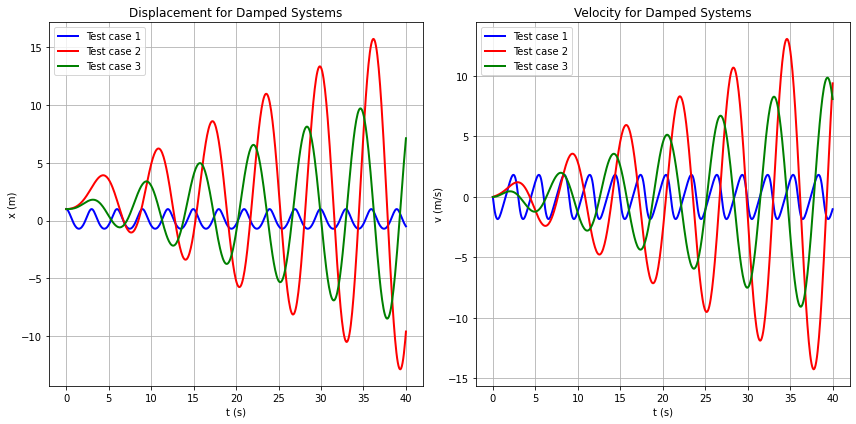

In [127]:
# 4. Test code using values of F(t)/m (FOR ALL UNDER DAMPED CASES)

%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

zeta_ud = 0.1
omega_n = 1.0
omega_d = omega_n * sqrt(1-zeta_ud**2)

# Test case 1: f(t)/m = 1 - 5*x - 2*cos(v)
def dvdt_1(t, v, x):
    return 1 - 5*x - 2*cos(v)
def dxdt_1(t, v, x):
    return v

# Test case 2: f(t)/m = 2 - (omega_d**2)*x - 0.75*cos(t)
def dvdt_2(t, v, x):
    return 2 - (omega_d**2)*x - 0.75*cos(t) 
def dxdt_2(t, v, x):
    return v

# Test case 3: f(t)/m = 1 - (omega_d**2)*x + 0.5*sin(t)
def dvdt_3(t, v, x):
    return 1 - (omega_d**2)*x + 0.5*sin(t)
def dxdt_3(t, v, x):
    return v

v0 = 0
x0 = 1
t0 = 0
t_end = 40
dt = (t_end- t0)/499

t_1 = t0
t_2 = t0
t_3 = t0

v_1 = v0
v_2 = v0
v_3 = v0

x_1 = x0
x_2 = x0
x_3 = x0

t_list_1 = [t0]
t_list_2 = [t0]
t_list_3 = [t0]

v_list_1 = [v0]
v_list_2 = [v0]
v_list_3 = [v0]

x_list_1 = [x0]
x_list_2 = [x0]
x_list_3 = [x0]

def RungeKuttaCoupled(x, y, z, dx, dydx, dzdx):
    k1 = dx*dydx(x, y, z)
    h1 = dx*dzdx(x, y, z)
    
    k2 = dx*dydx(x+dx/2., y+k1/2., z+h1/2.)
    h2 = dx*dzdx(x+dx/2., y+k1/2., z+h1/2.)
    
    k3 = dx*dydx(x+dx/2., y+k2/2., z+h2/2.)
    h3 = dx*dzdx(x+dx/2., y+k2/2., z+h2/2.)
    
    k4 = dx*dydx(x+dx, y+k3, z+h3)
    h4 = dx*dzdx(x+dx, y+k3, z+h3)

    y = y + 1./6.*(k1+2*k2+2*k3+k4)
    z = z + 1./6.*(h1+2*h2+2*h3+h4)
    x = x + dx
    return x, y, z


while t_1 <= t_end or t_2 <= t_end or t_3 <= t_end:
    t_1, v_1, x_1 = RungeKuttaCoupled(t_1, v_1, x_1, dt, dvdt_1, dxdt_1)
    t_list_1.append(t_1)
    v_list_1.append(v_1)
    x_list_1.append(x_1)

    t_2, v_2, x_2 = RungeKuttaCoupled(t_2, v_2, x_2, dt, dvdt_2, dxdt_2)
    t_list_2.append(t_2)
    v_list_2.append(v_2)
    x_list_2.append(x_2)

    t_3, v_3, x_3 = RungeKuttaCoupled(t_3, v_3, x_3, dt, dvdt_3, dxdt_3)
    t_list_3.append(t_3)
    v_list_3.append(v_3)
    x_list_3.append(x_3)    
    
print ()
print ("UNDER DAMPED TEST CASE 1: f(t)/m = 1 - 5*x - 2*cos(v)") 
print ("UNDER DAMPED TEST CASE 2: f(t)/m = 2 - (omega_d**2)*x - 0.75*cos(t)")
print ("UNDER DAMPED TEST CASE 3: f(t)/m = 1 - (omega_d**2)*x + 0.5*sin(t)")
print ()

fig = plt.figure(figsize=(12,6))
# Plotting displacement
ax1 = plt.subplot(121)
plt.plot(t_list_1, x_list_1, label="Test case 1",color="b",linewidth="2.0")
plt.plot(t_list_2, x_list_2, label="Test case 2",color="r",linewidth="2.0")
plt.plot(t_list_3, x_list_3, label="Test case 3",color="g",linewidth="2.0")
plt.title("Displacement for Damped Systems")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.tight_layout()
plt.grid()


# Plotting velocity
ax2 = plt.subplot(122)
plt.plot(t_list_1, v_list_1, label="Test case 1",color="b",linewidth="2.0")
plt.plot(t_list_2, v_list_2, label="Test case 2",color="r",linewidth="2.0")
plt.plot(t_list_3, v_list_3, label="Test case 3",color="g",linewidth="2.0")
plt.title("Velocity for Damped Systems")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.tight_layout()
plt.grid()

plt.show()


UNDER DAMPED TEST CASE: f(t)/m = A*cos(omega_d*t)




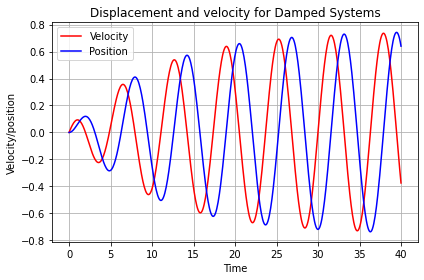

In [132]:
# 5. Test code using values of F(t)/m = A*cos(omega_n*t) (FOR ALL UNDER DAMPED CASES)

%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

zeta_ud = 0.1
omega_n = 1.0
omega_d = omega_n * sqrt(1-zeta_ud**2)
A = 0.15

# Test case: f(t)/m = A*cos(omega_n*t)
def dvdt_1(t, v, x):
    return - 2*zeta_ud*omega_d*v - (omega_d**2)*x + A*cos(omega_d*t)
def dxdt_1(t, v, x):
    return v

v0 = 0
x0 = 0
t0 = 0
t_end = 40
dt = (t_end- t0) / 499

t_1 = t0
v_1 = v0
x_1 = x0

t_list_1 = [t0]
v_list_1 = [v0]
x_list_1 = [x0]

def RungeKuttaCoupled(x, y, z, dx, dydx, dzdx):
    k1 = dx*dydx(x, y, z)
    h1 = dx*dzdx(x, y, z)
    
    k2 = dx*dydx(x+dx/2., y+k1/2., z+h1/2.)
    h2 = dx*dzdx(x+dx/2., y+k1/2., z+h1/2.)
    
    k3 = dx*dydx(x+dx/2., y+k2/2., z+h2/2.)
    h3 = dx*dzdx(x+dx/2., y+k2/2., z+h2/2.)
    
    k4 = dx*dydx(x+dx, y+k3, z+h3)
    h4 = dx*dzdx(x+dx, y+k3, z+h3)

    y = y + 1./6.*(k1+2*k2+2*k3+k4)
    z = z + 1./6.*(h1+2*h2+2*h3+h4)
    x = x + dx
    return x, y, z

while t_1 <= t_end:
    t_1, v_1, x_1 = RungeKuttaCoupled(t_1, v_1, x_1, dt, dvdt_1, dxdt_1)
    t_list_1.append(t_1)
    v_list_1.append(v_1)
    x_list_1.append(x_1)
    
print ("\nUNDER DAMPED TEST CASE: f(t)/m = A*cos(omega_d*t)\n\n") 

plt.title("Displacement and velocity for Damped Systems")
plt.plot(t_list_1, v_list_1, label="Velocity", color="red")
plt.plot(t_list_1, x_list_1, label="Position", color="blue")
plt.xlabel("Time")
plt.ylabel("Velocity/position")
plt.legend(loc="best")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()